## Unsupervised Machine learning techniques Lab -By Binatna Data-
- **Sessions of Mars 2024**

<p style="text-align:center">
    <a href="https://www.linkedin.com/company/100193879/" target="_blank">
    <img src="https://github.com/ismailouahbi/binatnadata/blob/main/logo/logo.png?raw=true" width="100" height="100" alt="Binatna Data Logo"  />
    </a>
</p>

#### Setting Up the Environment

* [Install Python and Jupyter Notebook](https://medium.com/@kswalawage/install-python-and-jupyter-notebook-to-windows-10-64-bit-66db782e1d02).

In [ ]:
# install required libraries
!pip install scikit-learn pandas numpy matplotlib seaborn 

![https://miro.medium.com/max/2550/0*GVjzZeYrir0R_6-X.png](https://miro.medium.com/max/2550/0*GVjzZeYrir0R_6-X.png)

#### Some informations about the data

1. sepal length in cm
2. sepal width in cm
3. petal length in cm
4. petal width in cm
5. classes:
-- Iris Setosa
-- Iris Versicolour
-- Iris Virginica

<hr>

#### Let us Solve the problem

In [1]:
# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn.cluster import KMeans 

In [2]:
# read the data
iris = pd.read_csv("data/IRIS.csv")

In [3]:
# data head (first 5 rows)
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
# some informations about the attributes
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [5]:
# data shape (number of rows, number of columns)
iris.shape

(150, 5)

In [6]:
# extract features
features = iris.iloc[:, [0, 1, 2, 3]].values

In [7]:
# Frequency distribution of species (in %)
iris["species"].value_counts(normalize=True)*100

species
Iris-setosa        33.333333
Iris-versicolor    33.333333
Iris-virginica     33.333333
Name: proportion, dtype: float64

In [8]:
# extract labels
iris_setosa=iris.loc[iris["species"]=="Iris-setosa"]
iris_virginica=iris.loc[iris["species"]=="Iris-virginica"]
iris_versicolor=iris.loc[iris["species"]=="Iris-versicolor"]

<hr>

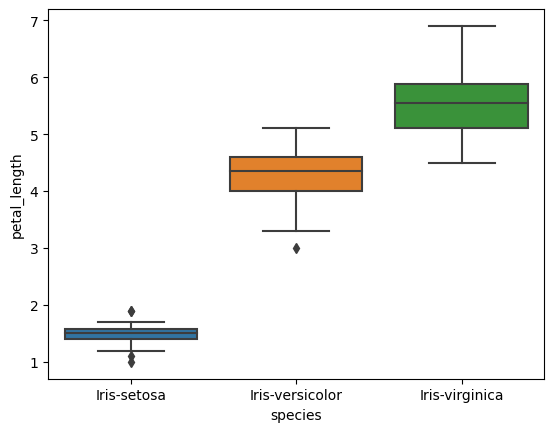

In [9]:
# Compare species by petal length (using box plot)
sns.boxplot(x="species",y="petal_length",data=iris)
plt.show()

C:\Users\ISMAIL\anaconda3\lib\site-packages\seaborn\axisgrid.py:2095: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


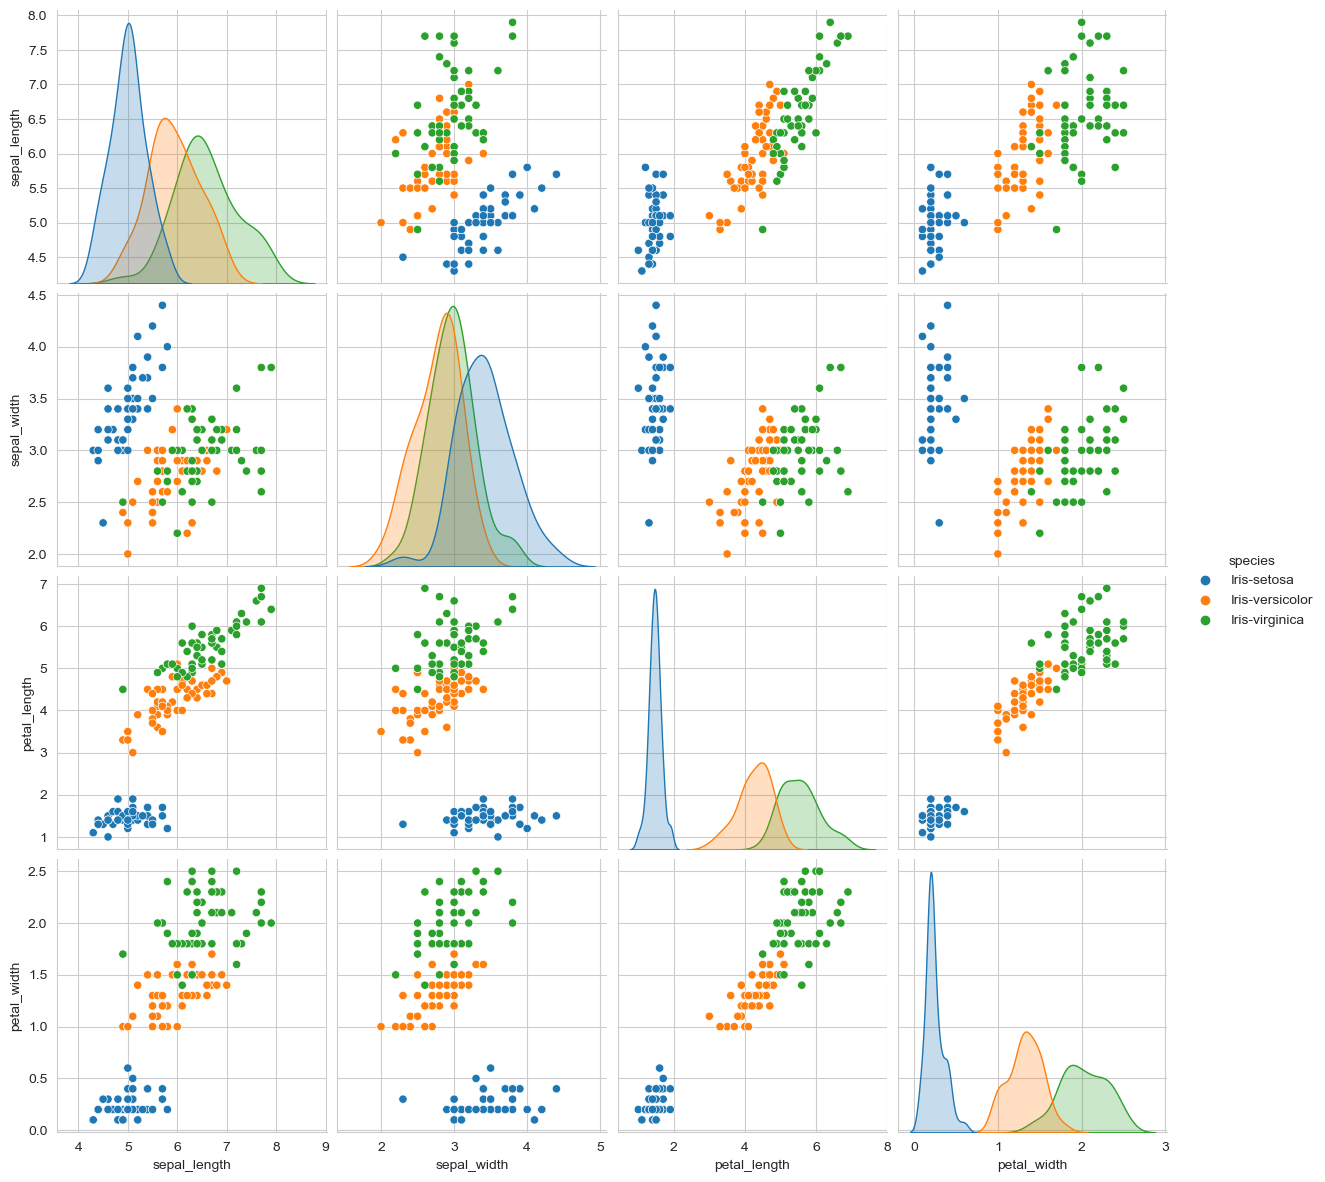

In [10]:
# scatter plot
sns.set_style("whitegrid")
sns.pairplot(iris,hue="species",size=3);
plt.show()

# K-Means

[K-means](http://https://www.analyticsvidhya.com/blog/2019/08/comprehensive-guide-k-means-clustering/) is a centroid-based algorithm, or a distance-based algorithm, where we calculate the distances to assign a point to a cluster. In K-Means, each cluster is associated with a centroid.

# How to Implementing K-Means Clustering ?

* Choose the number of clusters k
* Select k random points from the data as centroids
* Assign all the points to the closest cluster centroid
* Recompute the centroids of newly formed clusters
* Repeat steps 3 and 4


In [26]:
# in case of error within the model execution
## !pip install --upgrade threadpoolctl

* Note:
    - Inertia measures how well a dataset was clustered by K-Means.
    - A good model is one with low inertia

In [11]:
#Finding the optimum number of clusters for k-means clustering
from sklearn.cluster import KMeans
wcss = []

# We choose this list [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 0)
    kmeans.fit(features)
    wcss.append(kmeans.inertia_)

# Using the elbow method to determine the optimal number of clusters for k-means clustering


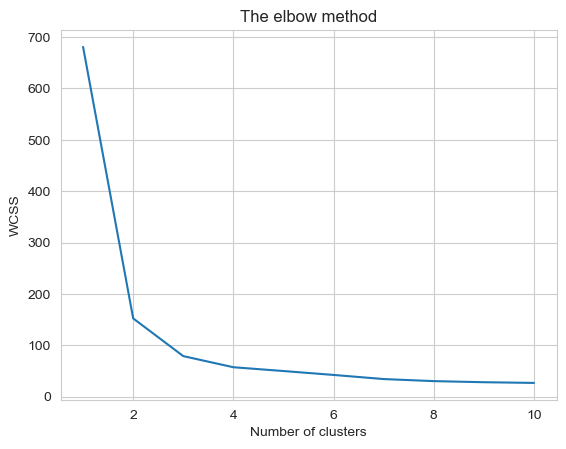

In [12]:
plt.plot(range(1, 11), wcss)
plt.title('The elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS') #within cluster sum of squares
plt.show()

# Implementing K-Means Clustering using the optimal number of clusters

In [13]:
kmeans = KMeans(n_clusters = 3,random_state = 0)
# fit predict to assign each record to a cluster
y_kmeans = kmeans.fit_predict(features)

In [15]:
# check 
y_kmeans

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 2, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2,
       2, 2, 2, 0, 0, 2, 2, 2, 2, 0, 2, 0, 2, 0, 2, 2, 0, 0, 2, 2, 2, 2,
       2, 0, 2, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 0])

<hr>

#### visualize and compare

<Axes: xlabel='sepal_length', ylabel='sepal_width'>

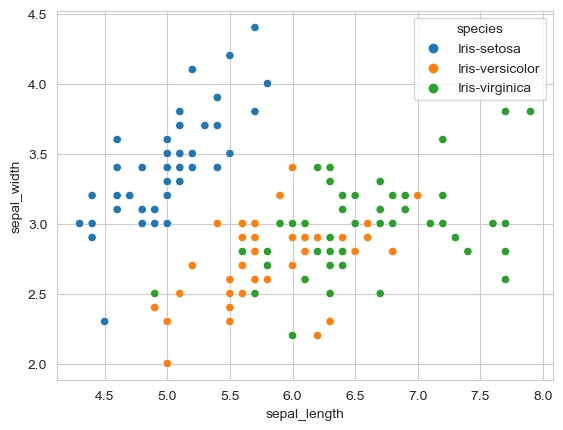

In [57]:
# the ground truth
sns.scatterplot(x='sepal_length',y='sepal_width', data=iris, hue='species')

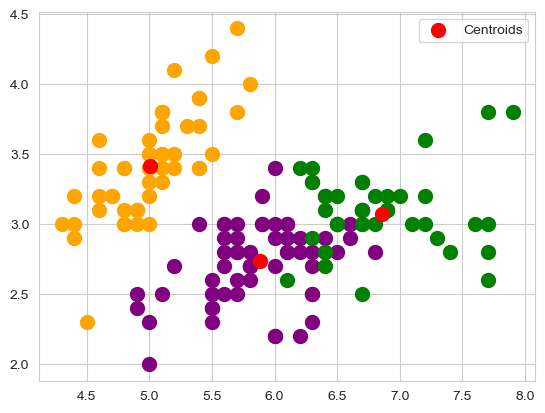

In [43]:
#Visualising the clusters

plt.scatter(features[y_kmeans == 0, 0], features[y_kmeans == 0, 1], s = 100, c = 'purple')
plt.scatter(features[y_kmeans == 1, 0], features[y_kmeans == 1, 1], s = 100, c = 'orange')
plt.scatter(features[y_kmeans == 2, 0], features[y_kmeans == 2, 1], s = 100, c = 'green')

#Plotting the centroids of the clusters
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:,1], s = 100, c = 'red', label = 'Centroids')

plt.legend()

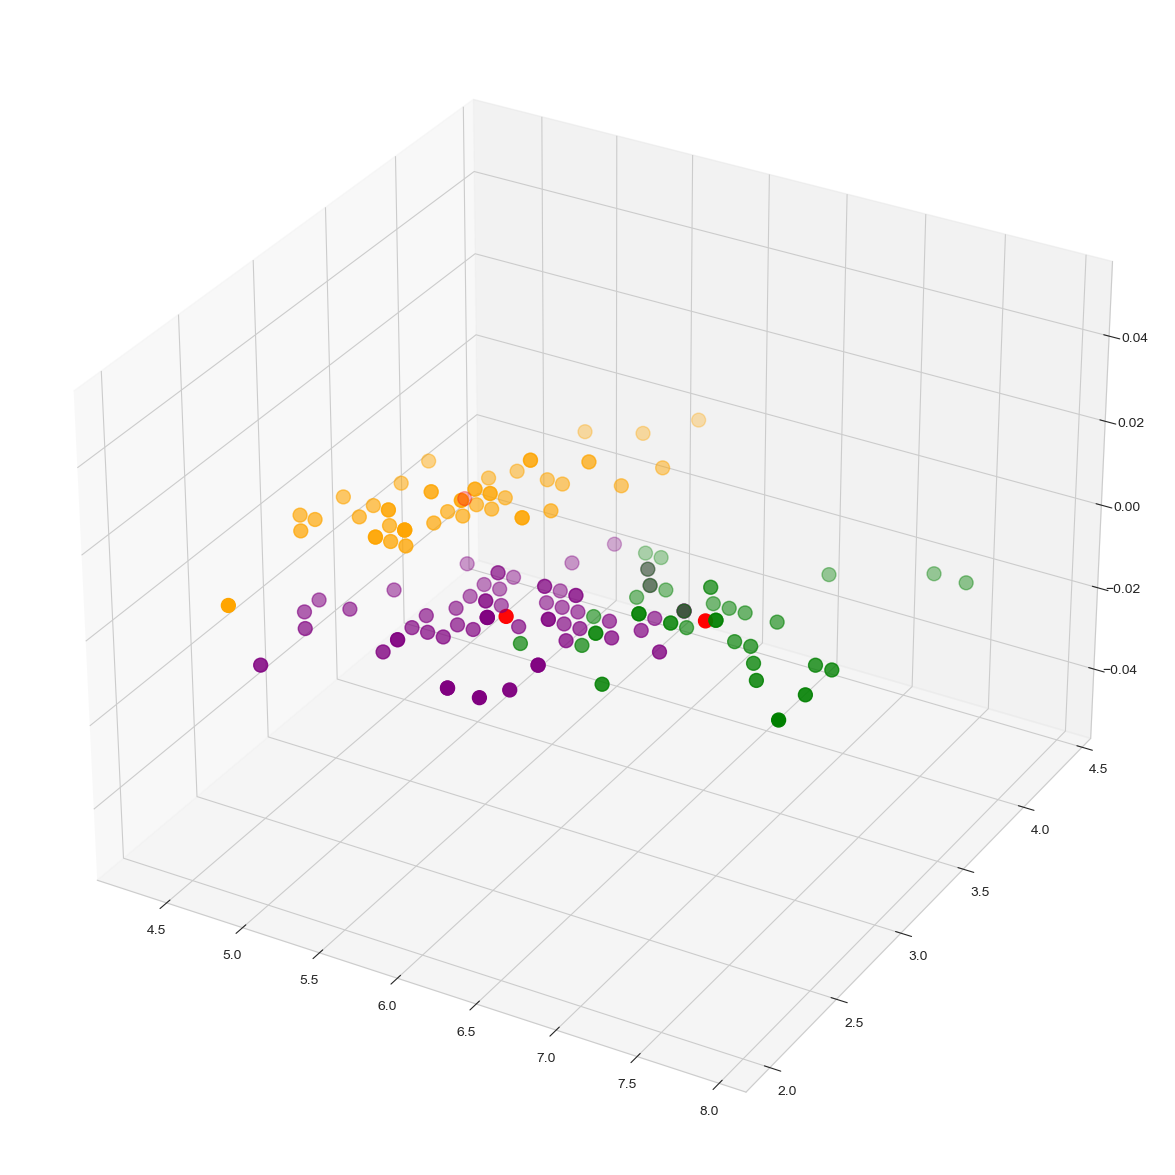

In [41]:
# 3d scatterplot using matplotlib

fig = plt.figure(figsize = (15,15))
ax = fig.add_subplot(111, projection='3d')
plt.scatter(features[y_kmeans == 0, 0], features[y_kmeans == 0, 1], s = 100, c = 'purple')
plt.scatter(features[y_kmeans == 1, 0], features[y_kmeans == 1, 1], s = 100, c = 'orange')
plt.scatter(features[y_kmeans == 2, 0], features[y_kmeans == 2, 1], s = 100, c = 'green')

#Plotting the centroids of the clusters
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:,1], s = 100, c = 'red', label = 'Centroids')
plt.show()

<hr>

---
### Machine learning foundations (C) 2024 [BinatnaData](https://www.linkedin.com/company/100193879/) Corporation

<p style="text-align:center">
    <a href="https://www.linkedin.com/company/100193879/" target="_blank">
    <img src="https://github.com/ismailouahbi/binatnadata/blob/main/logo/logo.png?raw=true" width="100" height="100" alt="Binatna Data Logo"  />
    </a>